In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
data = pd.read_csv(r'/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv')
data

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [11]:
df=data.reset_index()['Close']
df.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

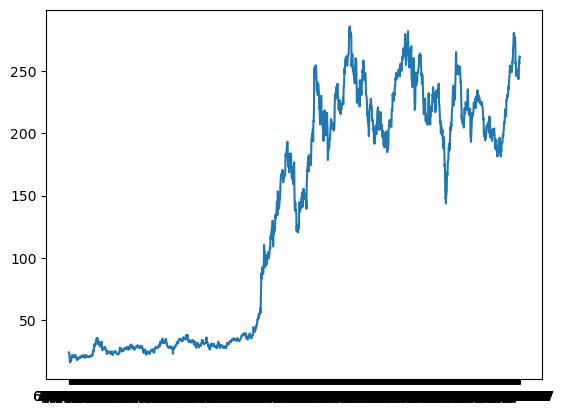

In [12]:
plt.plot(data['Date'],df)

In [14]:
# 資料 scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
'''
# 從 scaled data 製作訓練集
from sklearn.model_selection import train_test_split
X = df1
y = df1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
'''


'\n# 從 scaled data 製作訓練集\nfrom sklearn.model_selection import train_test_split\nX = df1\ny = df1\nX_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)\n'

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

NameError: name 'X_train' is not defined

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step-1):#N,n,t.....n=t+2
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----9
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
'''
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-time_step):#N,n,t
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----9
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
'''

In [ ]:
'''
time_step = 10
X_train, y_train = create_dataset(X_train, time_step)
X_test, y_test = create_dataset(X_test, time_step)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
'''

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(X_train, time_step)
X_test, y_test = create_dataset(X_test, time_step)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train.shape[0]

In [ ]:
len(X_train)

In [ ]:
X_train.shape[1]

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train

In [ ]:
print(X_train.shape), print(X_test.shape)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#LSTM魔法陣
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))#input10,output50
model.add(LSTM(50,return_sequences=True))#output50，input來自前面
model.add(LSTM(50))#output50，input來自前面


model.add(Dense(1))#收斂為1
model.compile(loss='mean_squared_error',optimizer='adam')#

In [ ]:
model.summary()
#none值就是不要specify它
#取決於電腦cpu

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)
#none = batch_size=64
#epocha = 回合

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict

In [ ]:
test_predict

In [ ]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
#因為標準化過
train_predict


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))
#算performancem,越小越好

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
plt.plot(scaler.inverse_transform(df1),'blue')
plt.plot(train_predict,'red')
plt.plot(test_predict,'green')
plt.show()

In [ ]:
### Plotting 
# shift train predictions for plotting
time_step=10
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict)+time_step, :] = train_predict#平移
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_step*2)+1:len(df1)-1, :] = test_predict


# plot baseline and predictions

plt.plot(scaler.inverse_transform(df1),'blue')
plt.plot(trainPredictPlot,'red')
plt.plot(testPredictPlot,'green')
plt.show()

In [ ]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
# 資料 scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
# 從 scaled data 製作訓練集
X_train = []
y_train = []

for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
  
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train,(X_train.shape [0], X_train.shape [1], 1))

In [ ]:
# Importing the Keras Libraries and packages 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout


In [ ]:
# 啟用 RNN
regressor = Sequential ()

In [ ]:
# 添加 LSTM layer 和要丟掉的資訊設置，會發現這邊就是一個 loop

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape [1], 1)))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout (0.2))

# output layer
regressor.add(Dense (units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
